In [121]:
import math
import warnings
from colorama import Fore

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [122]:
df = pd.read_csv('/Users/lacivert/3/ff3.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['Mkt-RF',
 'SMB',
 'HML',
 'SMALL LoBM-RF',
 'ME1 BM2-RF',
 'SMALL HiBM-RF',
 'BIG LoBM-RF',
 'ME2 BM2-RF',
 'BIG HiBM-RF',
 'RF']

In [123]:
# independent factors 
market_return, small_vs_big, value_vs_growth = df.loc[:,'Mkt-RF'], df.loc[:,'SMB'], df.loc[:,'HML']

# dependent factors on small companies across style
small_growth_excess_return, small_neutral_excess_return = df.loc[:,'SMALL LoBM-RF'], df.loc[:,'ME1 BM2-RF']

small_value_excess_return = df.loc[:,'SMALL HiBM-RF']   

# dependent factors on large companies across style 
large_growth_excess_return, large_neutral_excess_return = df.loc[:,'BIG LoBM-RF'], df.loc[:,'ME2 BM2-RF']

large_value_excess_return = df.loc[:,'BIG HiBM-RF']

In [124]:
# sanity check for length
len(market_return), len(small_vs_big), len(value_vs_growth),len(small_growth_excess_return), len(small_neutral_excess_return), len(small_value_excess_return),len(large_growth_excess_return), len(large_neutral_excess_return), len(large_value_excess_return)

(1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104)

In [125]:
# Run the regressions
regr = linear_model.LinearRegression()
Y = df['SMALL LoBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.RED + "'\nSmall Growth Portfolio Excess Return on 3 Factors")
print('\nCoefficients: ', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

small_growth_coeffs = regr.coef_
small_growth_alpha = regr.intercept_
small_growth_rsqrd = regr.score(X, Y)
#####################################
regr = linear_model.LinearRegression()
Y = df['ME1 BM2-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.GREEN + '\n\tSmall Neutral Portfolio Excess Return on 3 Factors')
print('\n\tCoefficients: ', regr.coef_)
print('\n\tIntercept: ', regr.intercept_)
print('\n\tR-squared:',  regr.score(X, Y))


small_neutral_coeffs = regr.coef_
small_neutral_alpha = regr.intercept_
small_neutral_rsqrd = regr.score(X, Y)
######################################
regr = linear_model.LinearRegression()
Y = df['SMALL HiBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.BLUE + '\n\t\tSmall Value Portfolio Excess Return on 3 Factors')
print('\n\t\tCoefficients: ', regr.coef_)
print('\n\t\tIntercept: ', regr.intercept_)
print('\n\t\tR-squared:', regr.score(X, Y))

small_value_coeffs = regr.coef_
small_value_alpha = regr.intercept_
small_value_rsqrd = regr.score(X, Y)
#####################################
regr = linear_model.LinearRegression()
Y = df['BIG LoBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.BLACK + '\nLarge Growth Portfolio Excess Return on 3 Factors')
print('\nCoefficients: ', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

large_growth_coeffs = regr.coef_
large_growth_alpha = regr.intercept_
large_growth_rsqrd = regr.score(X, Y)
#####################################
regr = linear_model.LinearRegression()
Y = df['ME2 BM2-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.MAGENTA + '\n\tLarge Neutral Portfolio Excess Return on 3 Factors')
print('\n\tCoefficients: ', regr.coef_)
print('\n\tIntercept: ', regr.intercept_)
print('\n\tR-squared:', regr.score(X, Y))

large_neutral_coeffs = regr.coef_
large_neutral_alpha = regr.intercept_
large_neutral_rsqrd = regr.score(X, Y)
######################################
regr = linear_model.LinearRegression()
Y = df['BIG HiBM-RF']
X = df[['Mkt-RF','SMB', 'HML']]
regr.fit(X, Y)

print(Fore.YELLOW + '\n\t\tLarge Value Portfolio Excess Return on 3 Factors')
print('\n\t\tCoefficients: ', regr.coef_)
print('\n\t\tIntercept: ', regr.intercept_)
print('\n\t\tR-squared:', regr.score(X, Y))

large_value_coeffs = regr.coef_
large_value_alpha = regr.intercept_
large_value_rsqrd = regr.score(X, Y)

'
Small Growth Portfolio Excess Return on 3 Factors

Coefficients:  [ 1.08845865  1.03733551 -0.19204224]

Intercept:  -0.15607637648846318

R-squared: 0.9747660850232415

	Small Neutral Portfolio Excess Return on 3 Factors

	Coefficients:  [0.98371966 0.81945716 0.29526846]

	Intercept:  0.04864523246355379

	R-squared: 0.978069909822615

		Small Value Portfolio Excess Return on 3 Factors

		Coefficients:  [1.02339806 0.92902604 0.78638082]

		Intercept:  0.021218161850596662

		R-squared: 0.9921284459293503

Large Growth Portfolio Excess Return on 3 Factors

Coefficients:  [ 1.02221942 -0.0919116  -0.22922249]

Intercept:  0.07479212176192906

R-squared: 0.9811419118782503

	Large Neutral Portfolio Excess Return on 3 Factors

	Coefficients:  [ 0.98611766 -0.13876716  0.32642338]

	Intercept:  -0.05836561347473246

	R-squared: 0.9508277054882855

		Large Value Portfolio Excess Return on 3 Factors

		Coefficients:  [1.08727363 0.01648414 0.7924494 ]

		Intercept:  -0.10269597287521437


In [126]:
small_growth_coeffs, small_neutral_coeffs, small_value_coeffs,
large_growth_coeffs, large_neutral_coeffs, large_value_coeffs

(array([ 1.02221942, -0.0919116 , -0.22922249]),
 array([ 0.98611766, -0.13876716,  0.32642338]),
 array([1.08727363, 0.01648414, 0.7924494 ]))

In [127]:
small_growth_alpha, small_neutral_alpha, small_value_alpha,
large_growth_alpha, large_neutral_alpha, large_value_alpha

(0.07479212176192906, -0.05836561347473246, -0.10269597287521437)

In [128]:
small_growth_rsqrd, small_neutral_rsqrd, small_value_rsqrd,
large_growth_rsqrd, large_neutral_rsqrd, large_value_rsqrd

(0.9811419118782503, 0.9508277054882855, 0.9686486651506865)

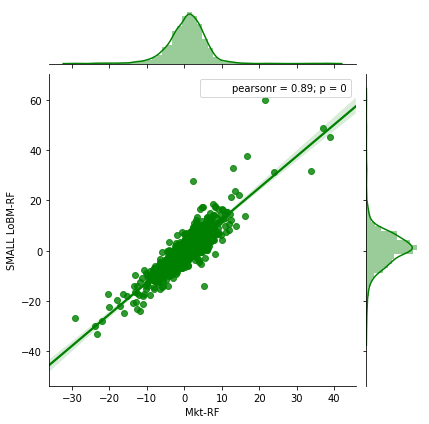

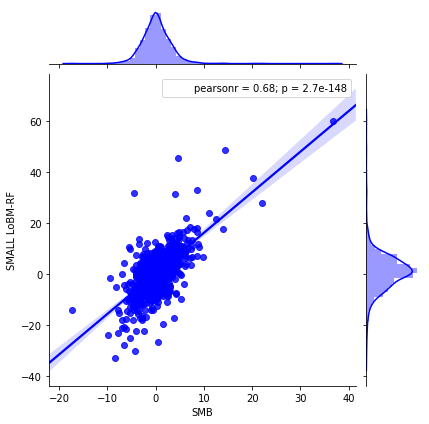

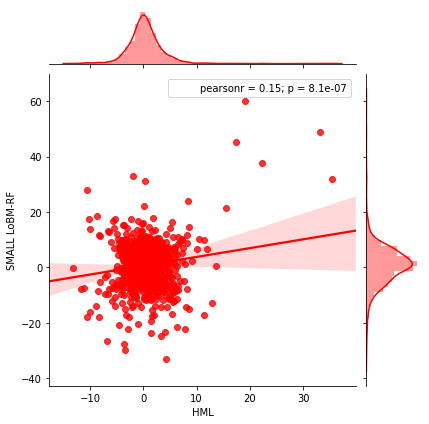

In [129]:
sns.jointplot(x="Mkt-RF", y="SMALL LoBM-RF", data=df, kind="reg", color='green');
sns.jointplot(x="SMB", y="SMALL LoBM-RF", data=df, kind="reg", color='blue');
sns.jointplot(x="HML", y="SMALL LoBM-RF", data=df, kind="reg",color='red');

In [130]:
portfolios=[small_growth_excess_return, small_neutral_excess_return, small_value_excess_return,
            large_growth_excess_return, large_neutral_excess_return, large_value_excess_return]

df_portfolios = pd.DataFrame.from_dict(portfolios)

In [131]:
np.min(small_growth_excess_return), np.min(small_neutral_excess_return), np.min(small_value_excess_return),np.min(large_growth_excess_return), np.min(large_neutral_excess_return), np.min(large_value_excess_return)

(-32.9695, -30.0821, -33.8586, -28.8971, -28.1793, -35.1431)

In [132]:
np.max(small_growth_excess_return), np.max(small_neutral_excess_return), np.max(small_value_excess_return),np.max(large_growth_excess_return), np.max(large_neutral_excess_return), np.max(large_value_excess_return)

(59.8978, 62.1565, 83.5454, 33.639, 51.7933, 67.7547)

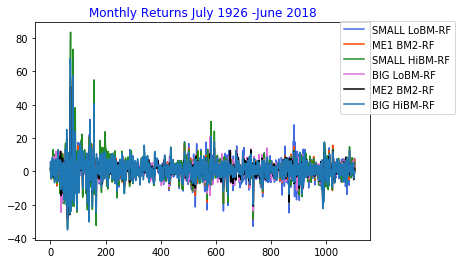

In [143]:
plt.plot (small_growth_excess_return,color='royalblue')
plt.plot (small_neutral_excess_return,color='orangered')
plt.plot (small_value_excess_return,color='forestgreen')
plt.plot (large_growth_excess_return,color='orchid')
plt.plot (large_neutral_excess_return,color='k')
plt.plot (large_value_excess_return)
#plt.xlabel ('Market Open Days', color='blue')
#plt.ylabel ('Exchange Rates in U.S. Dollars', color='blue')
plt.title ('Monthly Returns July 1926 -June 2018', color='blue')
plt.legend(bbox_to_anchor=(1.27, 1.03))

In [148]:
sns.relplot(data=df_portfolios)

AttributeError: module 'seaborn' has no attribute 'relplot'